In [1]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Leer el archivo master.csv
df = pd.read_csv('datosBalanceados.csv')
df.head()

C:\Users\caste\AppData\Local\Temp\ipykernel_28516\3762389153.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,year,suicides_no,population,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,suicides/100k pop
0,1987,21,312900,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,1987,16,308000,2.156625e+09,796.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,1987,14,289700,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,1987,1,21800,2.156625e+09,796.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1987,9,274300,2.156625e+09,796.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1


# Probabilidad de suicidio

Se usará la columna de suicides/100k pop que muestra la cantidad de suicidios por cada 100k habitantes.

In [2]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

In [3]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train)
print(y_train)

        year  suicides_no  population  gdp_for_year  gdp_per_capita  \
95635   1995          281      169983  4.642141e+10     4767.259254   
33752   2009           95      155921  2.616985e+10    12890.000000   
47094   2015          147      243077  4.150861e+10    15073.000000   
28254   2015          757     1676430  1.843884e+11    11784.000000   
77553   1994          278      241121  1.868528e+10     6797.157180   
...      ...          ...         ...           ...             ...   
128106  2011            9        5247  4.899197e+09    10397.511518   
103694  1999          275      188382  4.749694e+10     4984.132173   
860     2007          155     4601874  2.875305e+11     7918.000000   
15795   2010            0       30688  2.588176e+09     7806.000000   
121958  2009          909      498643  8.636103e+11    20765.943815   

        age_15-24  age_25-34  age_35-54  age_5-14  age_55-74  ...  \
95635       False      False      False     False      False  ...   
33752    

In [5]:
# Entrenar el modelo de naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [6]:
# Hacer predicciones
y_pred = model.predict(X_test)
print(y_pred)

[3 3 3 ... 3 3 3]


In [7]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.276668960770819


In [8]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 314  177 4253    0  518]
 [ 419  161 4316    0  417]
 [   0  131 4780    0  384]
 [   0  591 3304    0 1209]
 [   0  568 2631    0 1981]]


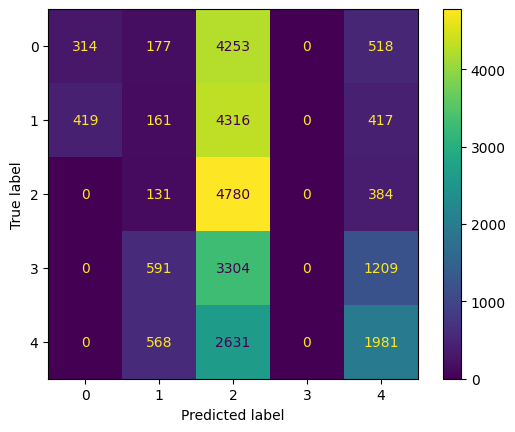

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [10]:
from sklearn.metrics import classification_report
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

           1       0.43      0.06      0.10      5262
           2       0.10      0.03      0.05      5313
           3       0.25      0.90      0.39      5295
           4       0.00      0.00      0.00      5104
           5       0.44      0.38      0.41      5180

    accuracy                           0.28     26154
   macro avg       0.24      0.28      0.19     26154
weighted avg       0.24      0.28      0.19     26154



# Mejorar el modelo

In [11]:
# Utilizar validación cruzada
from sklearn.model_selection import GridSearchCV
naive_bayes = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100),  # Var_smoothing values
}
grid = GridSearchCV(naive_bayes, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [12]:
grid.best_score_

0.29651295046035936

In [13]:
grid.best_params_

{'var_smoothing': 0.1873817422860384}

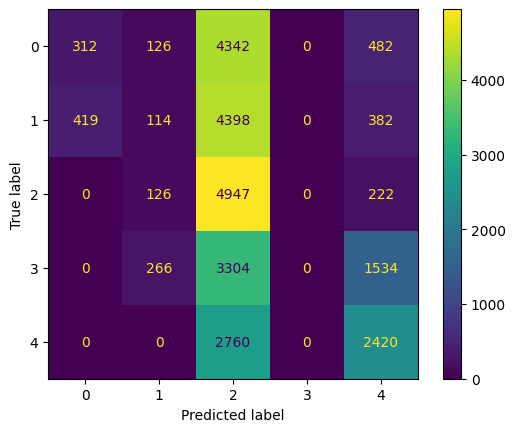

In [14]:
best = grid.best_estimator_
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [15]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 312  126 4342    0  482]
 [ 419  114 4398    0  382]
 [   0  126 4947    0  222]
 [   0  266 3304    0 1534]
 [   0    0 2760    0 2420]]


In [16]:
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

           1       0.43      0.06      0.10      5262
           2       0.18      0.02      0.04      5313
           3       0.25      0.93      0.40      5295
           4       0.00      0.00      0.00      5104
           5       0.48      0.47      0.47      5180

    accuracy                           0.30     26154
   macro avg       0.27      0.30      0.20     26154
weighted avg       0.27      0.30      0.20     26154

